# Higher-order data

XGI provides four ways for generating higher-order datasets:
1. Loading from a file (described later!)
2. Building node-by-node and edge-by-edge (Described in tutorial 1)
3. Generating a synthetic network from a model
4. Loading from XGI-DATA

In this tutorial, we will describe methods 3 and 4.

In [30]:
import matplotlib.pyplot as plt
import xgi

## Generating synthetic data

XGI has implemented many models for generating synthetic higher-order networks. See [here](https://xgi.readthedocs.io/en/stable/api/generators.html) for a full list. We will demonstrate a few common random models here.

In [41]:
H = xgi.load_xgi_data("email-enron")
H.cleanup()

n = H.num_nodes

In [56]:
H_rand = xgi.random_hypergraph(n, [0.005, 0.001], seed=2)
k = H.nodes.degree.asdict()
s = H.edges.size.asdict()
H_cl = xgi.chung_lu_hypergraph(k, s, seed=0)
H_hppm = xgi.uniform_HPPM(n, 3, 6, 0.95, seed=1)
H_sun = xgi.sunflower(5, 5, 10)

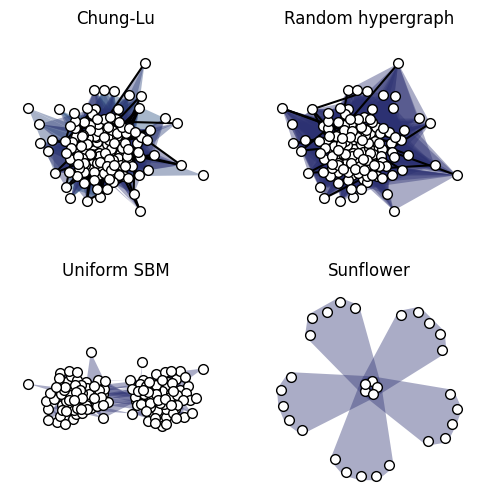

In [60]:
plt.figure(figsize=(6, 6))
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H_cl))
plt.subplot(221)
plt.title("Chung-Lu")
xgi.draw(H_cl, pos=pos)
plt.subplot(222)
plt.title("Random hypergraph")
xgi.draw(H_rand, pos=pos)
plt.subplot(223)
plt.title("Uniform SBM")
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H_hppm))
xgi.draw(H_hppm, pos=pos)
plt.subplot(224)
plt.title("Sunflower")
xgi.draw(H_sun, hull=True)
plt.show()

## XGI-DATA

... is an open-source repository of higher-order datasets in standard JSON format:
* 27 datasets and counting
* A [**table**](https://xgi.readthedocs.io/en/stable/xgi-data.html) of the datasets with their basic statistics
* Hosted on Zenodo 

First, let's see all the datasets that are available:

In [4]:
xgi.load_xgi_data()  # calling this function without arguments returns the list of all datasets

Available datasets are the following:
coauth-dblp
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
dawn
diseasome
disgenenet
email-enron
email-eu
hospital-lyon
hypertext-conference
invs13
invs15
kaggle-whats-cooking
malawi-village
ndc-classes
ndc-substances
science-gallery
sfhh-conference
tags-ask-ubuntu
tags-math-sx
tags-stack-overflow
threads-ask-ubuntu
threads-math-sx
threads-stack-overflow


Let's select a dataset with fewer than 1,000 nodes:

In [15]:
H = xgi.load_xgi_data("email-eu")
print(H)

Hypergraph named email-Eu with 1005 nodes and 235263 hyperedges


We can easily exclude edges larger than a certain size:

In [16]:
H2 = xgi.load_xgi_data("email-eu", max_order=2)
print(H2)

Hypergraph named email-Eu with 1005 nodes and 217012 hyperedges


We look at some of the statistics of the original dataset:

In [12]:
print(
    "The dataset is connected"
    if xgi.is_connected(H)
    else "The dataset is not connected"
)

The dataset is not connected


### Cleaning up

XGI provides a method called `cleanup` to easily tidy up higher-order datasets. Operations that `cleanup` can perform:
* Removing isolated nodes
* Removing singleton edges
* Removing multiedges
* Renaming nodes and edges to a standard labeling scheme
* Removing nodes and edges that are not part of the giant component

For example:

In [17]:
print(H.nodes)
print(H)
print(xgi.is_connected(H))

['2', '1', '4', '3', '5', '7', '6', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '18', '20', '21', '22', '23', '32', '40', '39', '26', '25', '35', '34', '29', '24', '37', '28', '38', '31', '27', '36', '41', '33', '30', '43', '42', '44', '45', '47', '46', '48', '49', '50', '51', '52', '54', '53', '55', '60', '58', '56', '59', '57', '61', '62', '63', '64', '66', '65', '68', '67', '69', '70', '71', '72', '73', '75', '74', '77', '76', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '92', '91', '93', '95', '94', '96', '97', '100', '102', '98', '101', '99', '103', '104', '105', '106', '107', '108', '112', '109', '113', '110', '111', '114', '115', '116', '117', '119', '118', '120', '121', '122', '124', '123', '125', '126', '127', '128', '130', '131', '129', '132', '133', '134', '135', '136', '137', '139', '138', '140', '141', '143', '142', '144', '145', '146', '148', '147', '149', '150', '151', '152', '154', '153', '156', '155', '157', '158', '

In [19]:
H.cleanup()
print(H.nodes)
print(H)
print(xgi.is_connected(H))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [62]:
# Save the file
xgi.download_xgi_data("email-enron")
# this now lives in email-enron.json

In [64]:
Hlocal = xgi.load_xgi_data("email-enron", read=True)  # now we are loading locally!
print(Hlocal)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges
